# 1. Data Wrangling (Titanic)
https://www.kaggle.com/c/titanic/overview

## ***1. Imports***
**Import _pandas_**

In [1]:
import pandas as pd

Pandas includes numpy as `np`, and it's convenient to have this available directly:

In [2]:
np = pd.np

**Import the dataframe, read it into a Panda's DataFrames and assign it to df.**

In [3]:
df = pd.read_csv('data/titanic/train.csv', index_col='PassengerId');

In [4]:
holdout = pd.read_csv('data/titanic/test.csv');

**Data Dictionary**

|Variable|Definition|Key|
| --- | --- | --- |
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|


**Variable Notes**  
pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

**Have a look at the first 5 rows of df using the head method**

In [5]:
df['family'] = df['SibSp'] + df['Parch']

**Have a look at the last 3 rows of df using the tail method**

**Using the _shape_ attribute, have a look at the diamensionality of the datasets.**

In [6]:
df.shape

(891, 12)

**Get the names of the columns and info about them (number of non null and type).**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
family      891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


**Use the describe method to see how the data is distributed (numerical features only!).**

In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,family
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


**Note:** You can use pandas_profiling.ProfileReport(df) to get a detailled report on df (can be long to run depending on the isze of the data).

**We can also get a list of the columns names:**

In [9]:
df.columns.tolist()

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'family']

**Set the number of rows diplayed by pandas to 15.**

In [10]:
pd.options.display.max_rows

60

In [11]:
pd.options.display.max_rows = 15

___
## ***2. Subsetting***
We can subset a dataframe by label, by index or a combination of both.  
There are different ways to do it, using .loc, .iloc and also [ ]. See documentation:  
https://pandas.pydata.org/pandas-docs/stable/indexing.html

**Let's have a look at the 'Pclass' column:**

In [12]:
df['Pclass']

PassengerId
1      3
2      1
3      3
4      1
5      3
      ..
887    2
888    1
889    3
890    1
891    3
Name: Pclass, Length: 891, dtype: int64

**Then at the 12th observation:**

In [13]:
df.iloc[11]

Survived                           1
Pclass                             1
Name        Bonnell, Miss. Elizabeth
Sex                           female
Age                               58
SibSp                              0
Parch                              0
Ticket                        113783
Fare                           26.55
Cabin                           C103
Embarked                           S
family                             0
Name: 12, dtype: object

In [14]:
df.loc[11]

Survived                                  1
Pclass                                    3
Name        Sandstrom, Miss. Marguerite Rut
Sex                                  female
Age                                       4
SibSp                                     1
Parch                                     1
Ticket                              PP 9549
Fare                                   16.7
Cabin                                    G6
Embarked                                  S
family                                    2
Name: 11, dtype: object

**At the 'Name' of the last three observations:**

In [15]:
df.loc[888:, 'Name']

PassengerId
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

**And finally look at the 'Age' and 'Fare' of the 45th, the 1rst and the 8th observations:**

In [16]:
df.loc[[44, 0, 7], ['Age', 'Fare']]

d:\pycon 2019\workshops\pandasscikitlearn\.venv\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Age,Fare
PassengerId,,
44,3.0,41.5792
0,NaN,NaN
7,54.0,51.8625


In [17]:
df.iloc[[44, 0, 7], [5, 9]]

,SibSp,Cabin
PassengerId,,
45,0,NaN
1,1,NaN
8,3,NaN


**!!WARNING!!**  Unlike Python and ``.iloc``, the end value in a range specified by ``.loc`` **includes** the last index specified.

___
## ***3. Let's clean here and there***

### **3.1 'Sex' column**

**Get the count of the different values of the 'Sex' column.**

In [18]:
c = df['Sex']  # df.Sex is also possible

In [19]:
c.value_counts()

male      577
female    314
Name: Sex, dtype: int64

**Labelise this column.**

In [20]:
dico_sex = {'male':0, 'female':1}

In [21]:
df['sex_lab'] = df['Sex'].map(dico_sex)

In [22]:
df['sex_lab'].value_counts()

0    577
1    314
Name: sex_lab, dtype: int64

### **3.2 'Embarked' column**

**Get the proportion of the different values of the 'Embarked' column.**

In [23]:
embarked = df['Embarked']

In [24]:
embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

**April 10, 1912:**   
From 9:30 a.m. until 11:30 a.m., passengers board the ship. Then at noon, the Titanic leaves the dock at Southhampton for its maiden voyage.  
First stop is in Cherbourg, France, where the Titanic arrives at 6:30 p.m. and leaves at 8:10 p.m, heading to Queenstown, Ireland (now known as Cobh).  
It is carrying 2,229 passengers and crew.  
https://www.thoughtco.com/titanic-timeline-1779210

**Labelise this column.**

In [25]:
dico_emb = {'S':1, 'C':2, 'Q':3}

In [26]:
df['embarked_lab'] = df['Embarked'].map(dico_emb)

In [27]:
df['embarked_lab']

PassengerId
1      1.0
2      2.0
3      1.0
4      1.0
5      1.0
      ... 
887    1.0
888    1.0
889    1.0
890    2.0
891    3.0
Name: embarked_lab, Length: 891, dtype: float64

**Get the proportion of the different values of the 'embarked_lab' column, including the NaN values.**

In [28]:
df['embarked_lab'].value_counts(normalize=True, dropna=False)

1.0    0.722783
2.0    0.188552
3.0    0.086420
NaN    0.002245
Name: embarked_lab, dtype: float64

**Replace the NaN values with 0.**

In [29]:
df['embarked_lab'] = df['embarked_lab'].fillna(0)  # fillna will not replace the column in-situ - it will return a column.

### **3.3 'Age' column**

**Plot an histogramme of the 'Age' colmun.**

In [30]:
%matplotlib inline

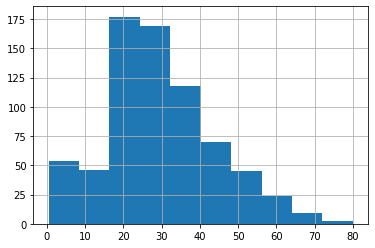

In [31]:
df['Age'].hist()

**Find the number of observations with NaN in the 'Age' column.**

In [32]:
df['Age'].isnull().sum()

177

**We are going to use median of each Pclass. Let's create a pivot table with these medians.**

In [33]:
age_median = df.pivot_table('Age', index='Pclass', aggfunc='median')

In [34]:
age_median

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [35]:
df['Age'] = df[['Age', 'Pclass']].apply(lambda x: age_median.loc[x['Pclass']].values[0] if pd.isnull(x['Age']) else x['Age'], axis=1)

**Plot an histogramme of the 'Age' colmun.**

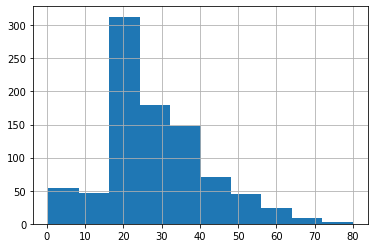

In [36]:
df['Age'].hist()

### **3.4 Sociological features**

**Create a new column with the number of other member of the family.**

In [37]:
df['family'] = df['SibSp'] + df['Parch']

In [38]:
df['family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family, dtype: int64

**Create a new column combining the number of members in the family and the Pclass.**

In [39]:
df['socio'] = (df['family'] + 1)* df['Pclass']  # adds 1 to all values in the pandas series

In [40]:
df.socio.value_counts()

3     348
2     174
1     109
6      92
9      47
4      41
18     17
8      13
21     12
15     12
12     10
33      7
24      6
5       2
10      1
Name: socio, dtype: int64

### **3.5 'Cabin Number' column**

**Have a look at a sample of the 'Cabin' column.**

In [41]:
df['Cabin'].sample(15, random_state = 10)

PassengerId
591      NaN
132      NaN
629      NaN
196      B80
231      C83
647      NaN
76     F G73
587      NaN
570      NaN
288      NaN
667      NaN
44       NaN
601      NaN
285      A19
243      NaN
Name: Cabin, dtype: object

**Create a 'Deck' column with the first letter of the cabin (or NaN).**

In [42]:
df['Deck'] = df['Cabin'].apply(lambda x: x if isinstance(x, float) else x[0])

In [43]:
df['Deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deck, dtype: int64

**Create a dummy 'other' columns for Deck A, F, G, T (because they are not well-represented enough).**

In [44]:
df['Deck'] = np.where(df['Deck'].isin(['A','F','G','T']), 'other', df['Deck'])  # replace Deck A, F, G or T with 'other'

In [45]:
df['Deck'].value_counts()

C        59
B        47
other    33
D        33
E        32
Name: Deck, dtype: int64

In [46]:
deck_dummies = pd.get_dummies(df['Deck'], prefix='Deck')

In [47]:
deck_dummies.head()  # transposes the data to make it easier to see

,Deck_B,Deck_C,Deck_D,Deck_E,Deck_other
PassengerId,,,,,
1,0,0,0,0,0
2,0,1,0,0,0
3,0,0,0,0,0
4,0,1,0,0,0
5,0,0,0,0,0


**Concatenate the dummies with the data.**

In [48]:
df = pd.concat([df, deck_dummies], axis=1)

In [49]:
df.shape

(891, 21)

## ***4. Dropping columns***

**Drop columns that will not be used anymore.**

In [50]:
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'Sex', 'Embarked', 'Deck']

In [51]:
df.drop(columns=columns_to_drop, axis=1)

,Survived,Pclass,Age,SibSp,Parch,Fare,family,sex_lab,embarked_lab,socio,Deck_B,Deck_C,Deck_D,Deck_E,Deck_other
PassengerId,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1.0,6,0,0,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,2.0,2,0,1,0,0,0
3,1,3,26.0,0,0,7.9250,0,1,1.0,3,0,0,0,0,0
4,1,1,35.0,1,0,53.1000,1,1,1.0,2,0,1,0,0,0
5,0,3,35.0,0,0,8.0500,0,0,1.0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0,0,1.0,2,0,0,0,0,0
888,1,1,19.0,0,0,30.0000,0,1,1.0,1,1,0,0,0,0
889,0,3,24.0,1,2,23.4500,3,1,1.0,12,0,0,0,0,0


## ***5. Reordering columns***
**We will reorder the the columns of this dataframe to have the target on the right.**  
**We can reindex them using a list.**

In [52]:
col_list = df.columns.tolist()

In [53]:
col_list.remove('Survived')

In [54]:
col_list.append('Survived')

In [55]:
df = df[col_list]

In [61]:
df.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,sex_lab,embarked_lab,socio,Deck,Deck_B,Deck_C,Deck_D,Deck_E,Deck_other,Survived
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,...,0,1.0,6,NaN,0,0,0,0,0,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,...,1,2.0,2,C,0,1,0,0,0,1


## ***6. Correlation***

In [56]:
import seaborn as sns

corr = df.corr()

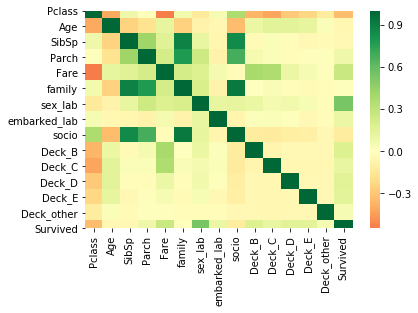

In [57]:
sns.heatmap(corr, center=0, cmap='RdYlGn')

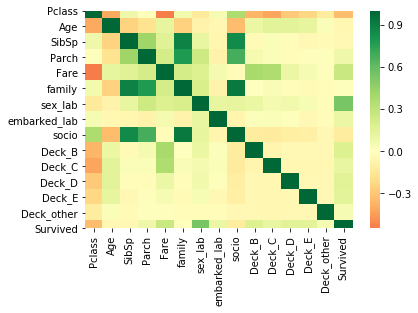

In [58]:
sns.heatmap(corr, center = 0, cmap = 'RdYlGn');

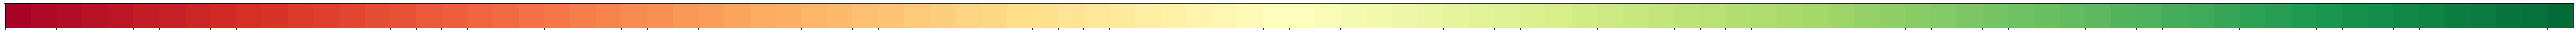

In [59]:
sns.palplot(sns.color_palette('RdYlGn', 100))

In [60]:
df[['family', 'socio', 'SibSp', 'Parch']].corr()

,family,socio,SibSp,Parch
family,1.000000,0.925814,0.890712,0.783111
socio,0.925814,1.000000,0.854492,0.684167
SibSp,0.890712,0.854492,1.000000,0.414838
Parch,0.783111,0.684167,0.414838,1.000000


## ***7. Holdout***


## ***8. Saving the dataframes as csv files***